# @Nguyễn Hữu Tuấn

0339591495

# 1. Mô tả

Xây dựng mô hình sử dụng hình ảnh để phân loại các kiểu dáng cho những sản phẩm chưa có thông tin kiểu dáng.


In [ ]:
import pandas as pd
import numpy as np
import missingno as mno

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('./drive/MyDrive/Code_Inter/')

Mounted at /content/drive/


In [ ]:
df= pd.read_csv('Cdata.csv')

In [ ]:
df= pd.DataFrame(df)

In [ ]:
df.shape

(2120, 9)

In [ ]:
df.dtypes

Mã vạch                 int64
Phân loại nhóm hàng    object
Dáng                   object
Dài                    object
Tay                    object
Hoa văn                object
Hoa văn sửa            object
Style                  object
Link ảnh (modified)    object
dtype: object

In [ ]:
df.head(10)

,Mã vạch,Phân loại nhóm hàng,Dáng,Dài,Tay,Hoa văn,Hoa văn sửa,Style,Link ảnh (modified)
0,11,VÁY,Váy xòe,Midi,Không tay,Trơn,Trơn,Đa dạng,https://pos.nvncdn.net/25034d-125144/ps/202207...
1,16,VÁY,Váy suông,Midi,Hai dây,Trơn,Trơn,Sexy,https://pos.nvncdn.net/25034d-125144/ps/202301...
2,19,VÁY,Váy xòe,Midi,Quây,Trơn,Trơn,Sexy,https://pos.nvncdn.net/25034d-125144/ps/202207...
3,24,VÁY,Váy body,Midi,Dài,Trơn,Trơn,Sexy,https://pos.nvncdn.net/25034d-125144/ps/202207...
4,31,VÁY,Váy suông,Midi,Dài,Ren,Ren,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202207...
5,32,VÁY,Váy suông,Midi,Ngắn,Ren,Ren,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202207...
6,33,VÁY,Váy suông,Midi,Không tay,Trơn,Trơn,Đa dạng,https://pos.nvncdn.net/25034d-125144/ps/202207...
7,34,VÁY,Váy suông,Midi,Ngắn,Kẻ,Kẻ,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202207...
8,36,VÁY,Váy suông,Midi,Ngắn,Chấm bi,Chấm bi,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202207...
9,37,VÁY,Váy suông,Midi,Ngắn,Ren,Ren,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202207...


In [ ]:
nan_cols = [i for i in df.drop(columns=['Mã vạch','Link ảnh (modified)']).columns]
# print(nan_cols)
for feature in nan_cols:
    a= df[feature].value_counts()
    print(a)

# 2. Các vấn đề của dữ liệu

## Missing value

In [ ]:
#Dữ liệu có Missing value không?
display("Missing value:",df.isnull().sum().sum())

'Missing value:'

262

In [ ]:
df.isnull().sum()

Mã vạch                  0
Phân loại nhóm hàng      0
Dáng                   262
Dài                      0
Tay                      0
Hoa văn                  0
Hoa văn sửa              0
Style                    0
Link ảnh (modified)      0
dtype: int64

<Axes: >

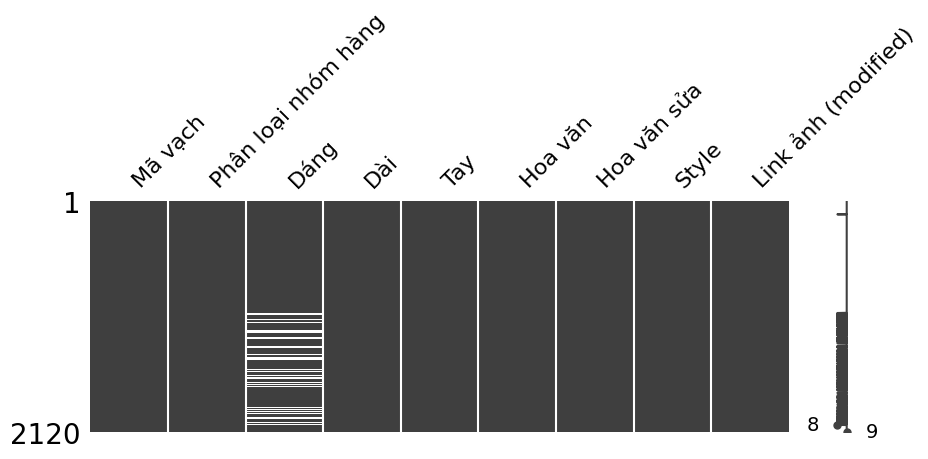

In [ ]:
mno.matrix(df, figsize = (10, 3))

In [ ]:
# Tính tỷ lệ phần trăm giá trị null
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

Dáng    12.358491
dtype: float64

Chưa xử lý trực tiếp vì chương trình sẽ được xây dựng để suy luận ra giá trị phù hợp cho chính các missing value này.

## Duplicated value

In [ ]:
df[df.duplicated(subset=['Mã vạch'],keep=False)]

,Mã vạch,Phân loại nhóm hàng,Dáng,Dài,Tay,Hoa văn,Hoa văn sửa,Style,Link ảnh (modified)
1460,8487,VÁY HÈ,Váy suông,Mini,Hai dây,Lấp lánh,Lấp lánh,Sexy,https://pos.nvncdn.net/25034d-125144/ps/202305...
1461,8487,VÁY HÈ,Váy suông,Mini,Hai dây,Trơn,Trơn,Sexy,https://lh3.googleusercontent.com/zkOUWEl1aXn2...
1741,9437,VÁY HÈ,Váy suông,Midi,Dài,Trơn,Trơn,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202306...
1742,9437,VÁY HÈ,Váy suông,Midi,Dài,Trơn,Trơn,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202306...
1745,9440,VÁY HÈ,Váy suông,Midi,Hai dây,Hoa,Hoa,Sexy,https://pos.nvncdn.net/25034d-125144/ps/202306...
1746,9440,VÁY HÈ,Váy suông,Midi,Hai dây,Hoa,Hoa,Sexy,https://pos.nvncdn.net/25034d-125144/ps/202306...
1747,9441,VÁY HÈ,Váy suông,Midi,Dài,Kẻ,Kẻ,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202306...
1748,9441,VÁY HÈ,Váy suông,Midi,Dài,Kẻ,Kẻ,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202306...


In [ ]:
df[df.duplicated(subset=['Link ảnh (modified)'],keep=False)]

,Mã vạch,Phân loại nhóm hàng,Dáng,Dài,Tay,Hoa văn,Hoa văn sửa,Style,Link ảnh (modified)
1597,8975,VÁY HÈ,Váy xòe,Midi,Ngắn,Trơn,Trơn,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202305...
1598,8976,VÁY HÈ,NaN,Midi,Hai dây,Trơn,Trơn,Sexy,https://pos.nvncdn.net/25034d-125144/ps/202305...
1741,9437,VÁY HÈ,Váy suông,Midi,Dài,Trơn,Trơn,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202306...
1742,9437,VÁY HÈ,Váy suông,Midi,Dài,Trơn,Trơn,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202306...
1745,9440,VÁY HÈ,Váy suông,Midi,Hai dây,Hoa,Hoa,Sexy,https://pos.nvncdn.net/25034d-125144/ps/202306...
1746,9440,VÁY HÈ,Váy suông,Midi,Hai dây,Hoa,Hoa,Sexy,https://pos.nvncdn.net/25034d-125144/ps/202306...
1747,9441,VÁY HÈ,Váy suông,Midi,Dài,Kẻ,Kẻ,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202306...
1748,9441,VÁY HÈ,Váy suông,Midi,Dài,Kẻ,Kẻ,Kín đáo,https://pos.nvncdn.net/25034d-125144/ps/202306...


In [ ]:
df.drop_duplicates(subset=['Mã vạch'], keep='last', inplace= True)
df[df.duplicated(subset=['Mã vạch'],keep=False)]

df.drop_duplicates(subset=['Link ảnh (modified)'], keep='first', inplace= True)
df[df.duplicated(subset=['Link ảnh (modified)'],keep=False)]

,Mã vạch,Phân loại nhóm hàng,Dáng,Dài,Tay,Hoa văn,Hoa văn sửa,Style,Link ảnh (modified)


In [ ]:
df.shape

(2115, 9)

## Drop link error

Các mẫu lỗi link không thể truy cập

Mã vạch: 8487 ; 6544




In [ ]:
import requests
import os

In [ ]:
ndrop= 0
for index, row in df.iterrows():
    image_url = row[8][8]  # Cột link ảnh
    if image_url!='p': # Checklink
      ndrop+= 1
      df.drop(index, inplace= True)

ndrop

6

# 3. Dataset

Tạo bộ dữ liệu từ link ảnh

In [ ]:
df.shape

(2109, 9)

## Save datanan( testdata)

Code chạy 1 lần để lưu ảnh test vào folder datanan

In [ ]:
feature= 'Dáng'
datanan= df.loc[df[feature].isnull()]

datanan.shape

(259, 9)

In [ ]:
data= df.dropna()
data.shape

(1850, 9)

In [ ]:
# os.makedirs('datanan', exist_ok=True)# Tạo thư mục lưu ảnh

In [ ]:
# output_folder = 'datanan'  # Tên thư mục lưu ảnh

# # Tạo thư mục nếu chưa tồn tại
# os.makedirs(output_folder, exist_ok=True)

# for index, row in datanan.iterrows():
#     label = row[0]  # Cột Dáng
#     image_url = row[8]  # Cột link ảnh

#     # Kiểm tra trạng thái của yêu cầu
#     response = requests.get(image_url)
#     if response.status_code == 200:
#         print(f"Truy cập thành công: {image_url}")
#         image_data = response.content

#         with open(os.path.join(output_folder, f'{label}.png'), 'wb') as f:
#             f.write(image_data)
#     else:
#         print(f"Lỗi khi truy cập: {image_url}")

# print("Hoàn thành việc tạo nhóm ảnh và tải ảnh.")

## Save ảnh train data

Code chạy 1 lần để lưu ảnh train vào folder train

Tỷ lệ: train/val= 2/1

In [ ]:
# from sklearn.model_selection import train_test_split

# X, y= data.drop('Dáng', axis = 1),data['Dáng']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # Phân model train test

In [ ]:
# X_test.shape

(611, 8)

In [ ]:
# os.makedirs('train', exist_ok=True)# Tạo thư mục lưu ảnh

In [ ]:
# for index, row in X_train.iterrows():
#     label = y_train  # Cột Dáng
#     image_url = row[7]  # Cột link ảnh

#     # Tạo thư mục cho nhãn nếu chưa tồn tại
#     # print(label[index])
#     label_folder = os.path.join('train', label[index])
#     os.makedirs(label_folder, exist_ok=True)

#     if requests.get(image_url).status_code== 200: # trạng thái
#       print("Truy cập thành công")
#       # Tải ảnh từ link và lưu vào thư mục tương ứng
#       image_data = requests.get(image_url).content

#     with open(os.path.join(label_folder, f'{row[0]}.png'), 'wb') as f:
#         f.write(image_data)

# print("Hoàn thành việc tạo nhóm ảnh và tải ảnh.")

Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công


## Set testdata( valdata)

Code chạy 1 lần để lưu ảnh test vào folder test

In [ ]:
# os.makedirs('test', exist_ok=True)# Tạo thư mục lưu ảnh

In [ ]:
# for index, row in X_test.iterrows():
#     label = y_test  # Cột Dáng
#     image_url = row[7]  # Cột link ảnh

#     # Tạo thư mục cho nhãn nếu chưa tồn tại
#     # print(label[index])
#     label_folder = os.path.join('test', label[index])
#     os.makedirs(label_folder, exist_ok=True)

#     if requests.get(image_url).status_code== 200: # trạng thái
#       print("Truy cập thành công")
#       # Tải ảnh từ link và lưu vào thư mục tương ứng
#       image_data = requests.get(image_url).content

#     with open(os.path.join(label_folder, f'{row[0]}.png'), 'wb') as f:
#         f.write(image_data)

# print("Hoàn thành việc tạo nhóm ảnh và tải ảnh.")

Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công
Truy cập thành công


# 4. Tiền xử lý

## Import

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
import tensorflow as tf


In [ ]:
train = '/content/drive/MyDrive/Code_Inter/train'

test= '/content/drive/MyDrive/Code_Inter/test'

pre= '/content/drive/MyDrive/Code_Inter/datanan'

## Tăng cường dữ liệu

In [ ]:
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 1239 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        test,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 611 images belonging to 3 classes.


In [ ]:
predict_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

predict_generator = predict_datagen.flow_from_directory(
        pre,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 259 images belonging to 1 classes.


# Biểu diễn dữ liệu

In [ ]:
class_names = list(train_generator.class_indices.keys()) # In ra các tên nhãn
class_names

['Váy body', 'Váy suông', 'Váy xòe']

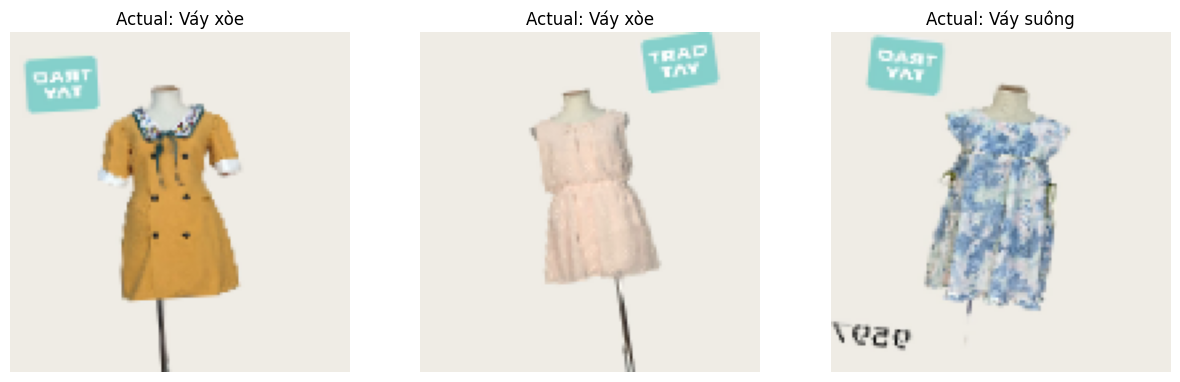

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_generator: # in ra hình ảnh
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class}")

        plt.axis("off")
    break

In [ ]:
train_generator.batch_size

32

In [ ]:
train_generator.image_shape

(128, 128, 3)

# Xây dựng mô hình
Code chạy 1 lần khi xây dựng mô hình.

## Model basic

### Cấu tạo các lớp

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=( 128, 128, 3), activation='relu')) # input có số shape= (32,128,128,3))- batchsize= 32.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=96, activation='relu'))

model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_3 (Dense)             (None, 96)               

### Biên dịch mô hình

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

## Train mô hình

### epochs= 30

Chạy 1 lần

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs= 30
)

Epoch 1/30
39/39 [==============================] - 289s 8s/step - loss: 1.0283 - accuracy: 0.4738 - val_loss: 0.9201 - val_accuracy: 0.4714
Epoch 2/30
39/39 [==============================] - 86s 2s/step - loss: 0.9376 - accuracy: 0.4746 - val_loss: 0.8978 - val_accuracy: 0.4975
Epoch 3/30
39/39 [==============================] - 106s 3s/step - loss: 0.9165 - accuracy: 0.4948 - val_loss: 0.8866 - val_accuracy: 0.5205
Epoch 4/30
39/39 [==============================] - 106s 3s/step - loss: 0.9109 - accuracy: 0.4859 - val_loss: 0.8949 - val_accuracy: 0.4910
Epoch 5/30
39/39 [==============================] - 91s 2s/step - loss: 0.8918 - accuracy: 0.5157 - val_loss: 0.8759 - val_accuracy: 0.4779
Epoch 6/30
39/39 [==============================] - 87s 2s/step - loss: 0.8801 - accuracy: 0.5270 - val_loss: 0.8334 - val_accuracy: 0.5254
Epoch 7/30
39/39 [==============================] - 106s 3s/step - loss: 0.8368 - accuracy: 0.5529 - val_loss: 0.8023 - val_accuracy: 0.5614
Epoch 8/30
39/39

In [ ]:
model.save('modelbasic.h5')

## epoch= 50

In [ ]:
model.save('modelbasic.h5')

In [ ]:
scores = model.evaluate(test_generator)

20/20 [==============================] - 20s 998ms/step - loss: 0.9431 - accuracy: 0.6023


In [ ]:
history.history['loss'][:5] # hiển thị giá trị hàm mất mát với 5 echo đầu tiên

[1.2267558574676514,
 0.9965429306030273,
 0.9506905674934387,
 0.9394270181655884,
 0.924056887626648]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 50

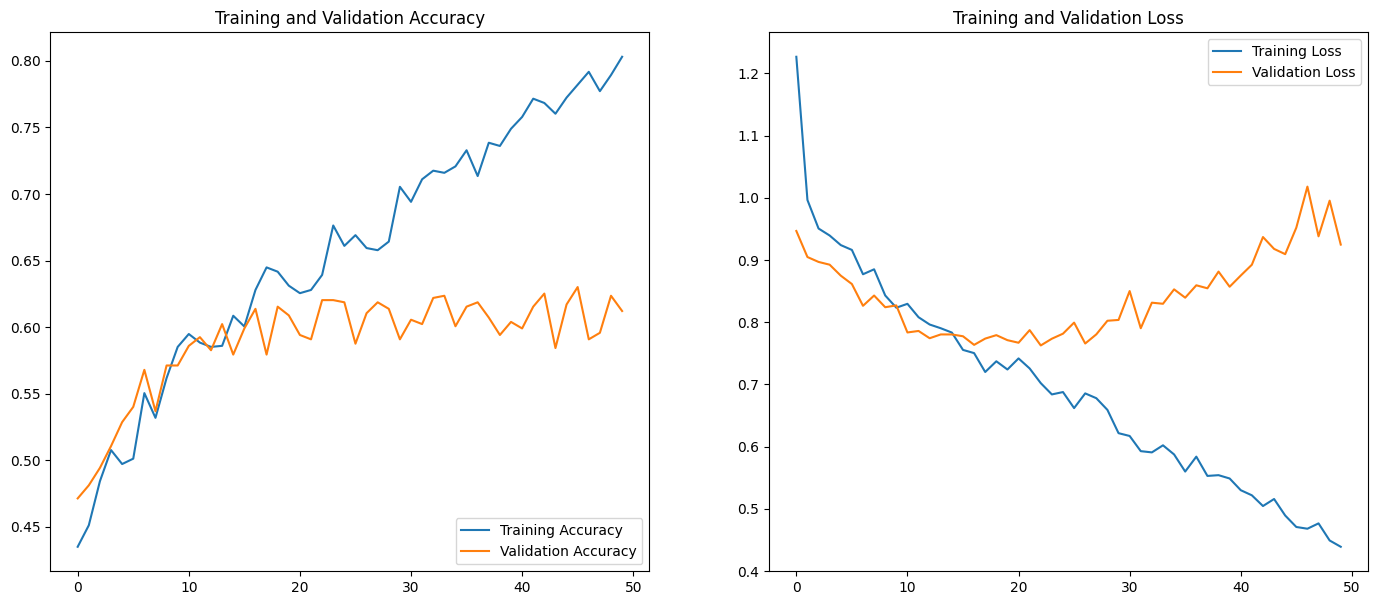

In [ ]:
plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Nhận xét**

Ta thấy Model có Loss tập train và valid giảm đồng thời trong 12 epoch đầu.

Từ epoch 13 trở đi model có dấu hiệu overfit khi giá trị loss tập valid không có xu hướng được cải thiện khi loss trên tập train giảm sâu.

Do đó ta sử dụng epoch= 12 như chỉ số phù hợp nhất

### epochs= 12

Chạy 1 lần

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs= 12
)

In [ ]:
model.save('model2.h5')

In [ ]:
scores = model.evaluate(test_generator)

20/20 [==============================] - 20s 1s/step - loss: 0.8063 - accuracy: 0.5843


# Sử dụng mô hình để dự đoán ảnh( với epoch= 50)

## Đánh giá độ chính xác

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model= load_model('modelh2.h5')

In [ ]:
# model2= load_model('modelbasic.h5')

In [ ]:
# model3 = load_model('modelvgg.h5')

## Predict valdata

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


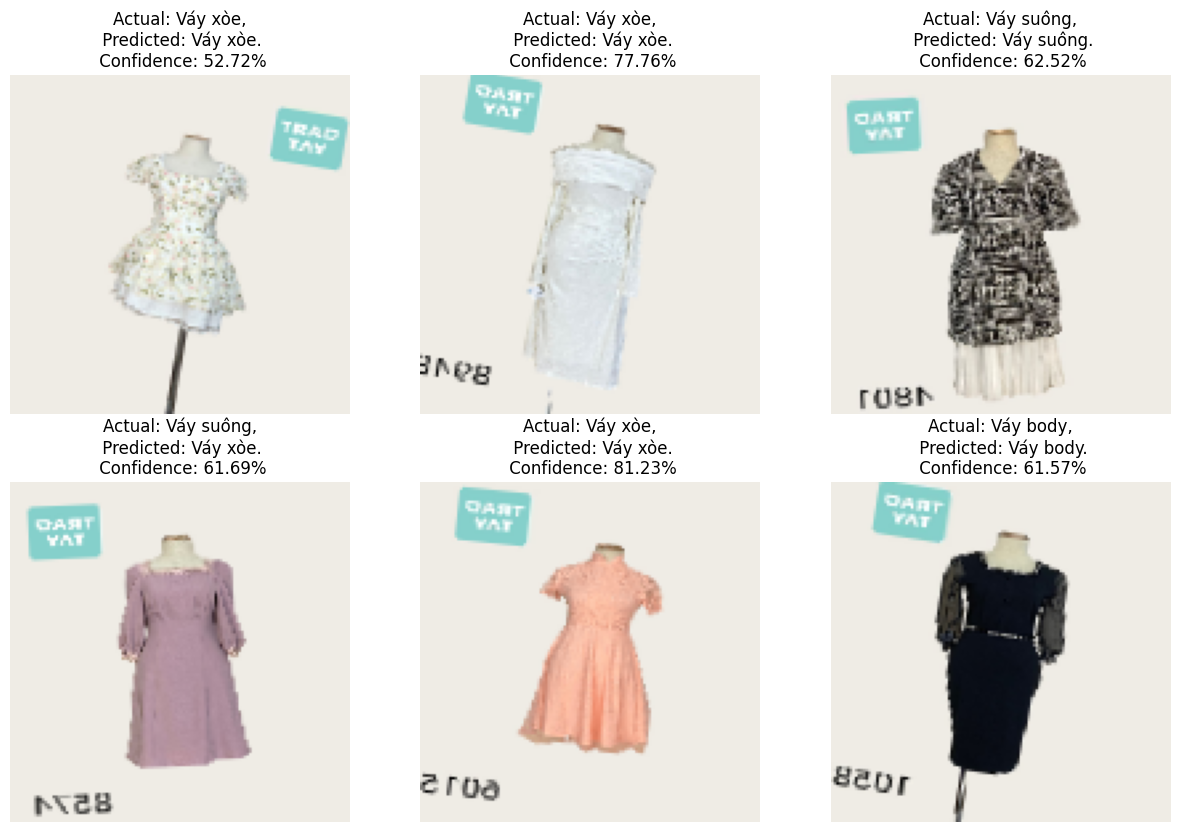

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        # Hiển thị
        plt.axis("off")
    break

## Predict testdata

1/1 [==============================] - 0s 46ms/step


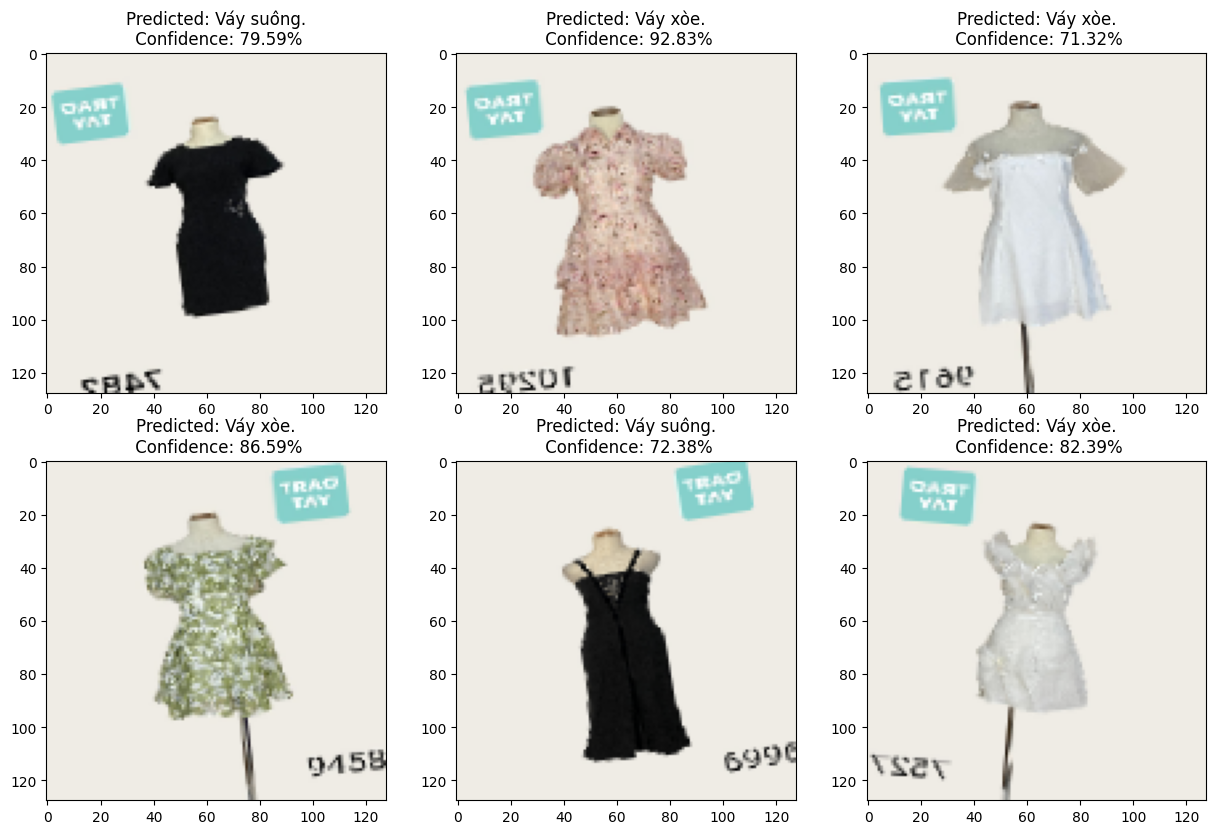

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in predict_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = 'NaN'

        plt.title(f"Predicted: {predicted_class}.\n Confidence: {confidence}%")
        # Hiển thị
    break

## Triển khai mô hình

Nhận dạng kiểu dáng cho các sản phẩm chưa phân loại

In [ ]:
# Chuyển dữ liệu kiểm đoán với biến test_generator
predict_generator = predict_datagen.flow_from_directory(
        pre,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
        shuffle= False
)

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

num = 0
found = False

for images, labels in predict_generator:
    for image in images:
        predicted_class, confidence = predict(model, image)
        # print(type(predicted_class))
        id = predict_generator.filenames[num]
        barcode = int(id[4:][-9:-4])
        df.loc[df['Mã vạch'] == barcode, 'Dáng'] = str(predicted_class)
        # print(df.loc[df['Mã vạch'] == barcode, 'Dáng'])
        num += 1
        if num == len(predict_generator.filenames):
            # plt.imshow(image)
            # plt.title(f"Actual: {barcode}")
            found = True
            break
    if found:
        break

Found 259 images belonging to 1 classes.
1/1 [==============================] - 0s 54ms/step


<Axes: >

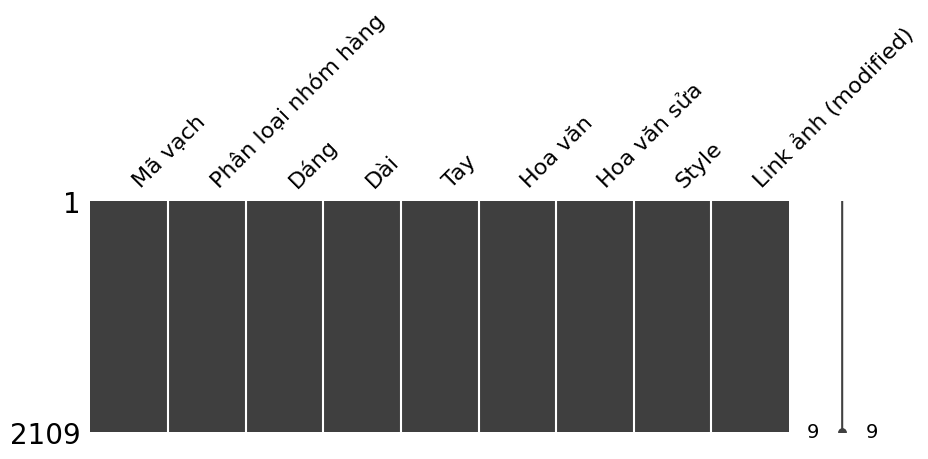

In [ ]:
mno.matrix(df, figsize = (10, 3))